In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [20]:
apple_stock = yf.download('AAPL', start = '2022-01-01', end = '2023-01-01')

[*********************100%%**********************]  1 of 1 completed


In [3]:
apple_stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152649,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441460,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018684,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675270,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.844353,132079200


In [21]:
apple_stock['Daily_Return'] = apple_stock['Adj Close'].pct_change()
apple_stock.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return
Date,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.953857,104487900,NaN
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.669968,99310400,-0.012692
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.943985,94537600,-0.026600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.056946,96904000,-0.016693
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.225052,86709100,0.000989


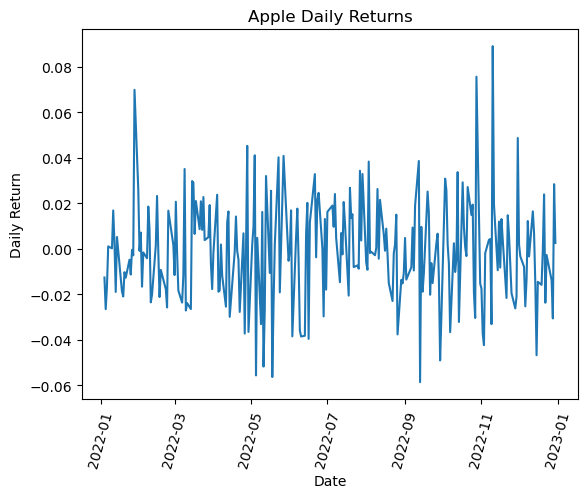

In [22]:
plt.plot(apple_stock['Daily_Return'])
plt.title('Apple Daily Returns')
plt.xlabel('Date')
plt.xticks(rotation = 75)
plt.ylabel('Daily Return')
plt.show()

In [26]:
#50days moving average
apple_stock['50_MA'] = apple_stock['Adj Close'].rolling(window = 50).mean()

In [24]:
apple_stock.tail(10)

,Open,High,Low,Close,Adj Close,Volume,Daily_Return
Date,,,,,,,
2022-12-16,136.690002,137.649994,133.729996,134.509995,133.762329,160156900,-0.014579
2022-12-19,135.110001,135.199997,131.320007,132.369995,131.634201,79592600,-0.015910
2022-12-20,131.389999,133.250000,129.889999,132.300003,131.564621,77432800,-0.000529
2022-12-21,132.979996,136.809998,132.750000,135.449997,134.697113,85928000,0.023810
2022-12-22,134.350006,134.559998,130.300003,132.229996,131.494995,77852100,-0.023773
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.127060,63814900,-0.002798
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.307236,69007800,-0.013878
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.339409,85438400,-0.030685
2022-12-29,127.989998,130.479996,127.730003,129.610001,128.889572,75703700,0.028324


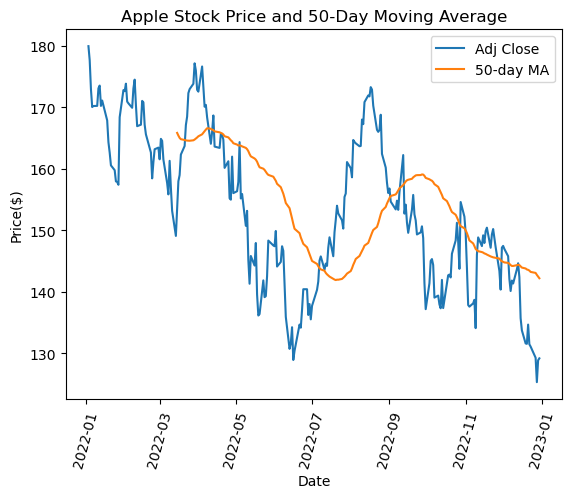

In [27]:
plt.plot(apple_stock['Adj Close'], label = 'Adj Close')
plt.plot(apple_stock['50_MA'], label = '50-day MA')
plt.title('Apple Stock Price and 50-Day Moving Average')
plt.xlabel('Date')
plt.xticks(rotation = 75)
plt.ylabel('Price($)')
plt.legend()
plt.show()

In [30]:
volatility  = apple_stock['Daily_Return'].std()
print(f'Volatility : {volatility}')

Volatility : 0.02247129139634201


In [33]:
risk_free_rate = 0.01 
annual_return =(apple_stock['Daily_Return'].mean()+1)**252-1
annual_volatility = apple_stock['Daily_Return'].std()*np.sqrt(252) #we are only working on weekdays not weekends 
sharpe_ratio = (annual_return - risk_free_rate)/annual_volatility 
print(f'Sharpe Ratio: {sharpe_ratio}')

# movement of the trend is downward so we got negative sharpe ratio


Sharpe Ratio: -0.6927822670786454


In [34]:
sp500 = yf.download("^GSPC", start = '2022-01-01', end = '2023-01-01')

[*********************100%%**********************]  1 of 1 completed


In [35]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,4778.140137,4796.640137,4758.169922,4796.560059,4796.560059,3831020000
2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,4793.540039,4683170000
2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,4700.580078,4887960000
2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,4696.049805,4295280000
2022-01-07,4697.660156,4707.950195,4662.740234,4677.029785,4677.029785,4181510000


In [37]:
sp500['Daily_Return_SP500'] = sp500['Adj Close'].pct_change()
sp500

,Open,High,Low,Close,Adj Close,Volume,Daily_Return_SP500
Date,,,,,,,
2022-01-03,4778.140137,4796.640137,4758.169922,4796.560059,4796.560059,3831020000,NaN
2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,4793.540039,4683170000,-0.000630
2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,4700.580078,4887960000,-0.019393
2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,4696.049805,4295280000,-0.000964
2022-01-07,4697.660156,4707.950195,4662.740234,4677.029785,4677.029785,4181510000,-0.004050
...,...,...,...,...,...,...,...
2022-12-23,3815.110107,3845.800049,3797.010010,3844.820068,3844.820068,2819280000,0.005868
2022-12-27,3843.340088,3846.649902,3813.219971,3829.250000,3829.250000,3030300000,-0.004050
2022-12-28,3829.560059,3848.320068,3780.780029,3783.219971,3783.219971,3083520000,-0.012021


In [39]:
joined_data = pd.concat([apple_stock['Daily_Return'],sp500['Daily_Return_SP500']], axis =1).dropna()

In [40]:
joined_data.head()

,Daily_Return,Daily_Return_SP500
Date,,
2022-01-04,-0.012692,-0.000630
2022-01-05,-0.026600,-0.019393
2022-01-06,-0.016693,-0.000964
2022-01-07,0.000989,-0.004050
2022-01-10,0.000116,-0.001441


In [42]:
beta = joined_data.cov().iloc[0,1]/joined_data['Daily_Return_SP500'].var()

In [44]:
print(f'Beta : {beta}')

Beta : 1.3057986276707378


In [46]:
apple_stock['20_MA'] = apple_stock['Adj Close'].rolling(window = 20).mean()

In [47]:
apple_stock['Upper_Band'] = apple_stock['20_MA']+2*apple_stock['Adj Close'].rolling(window = 20).std()

In [51]:
apple_stock.iloc[20:]

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,50_MA,20_MA,Upper_Band
Date,,,,,,,,,,
2022-02-01,174.009995,174.839996,172.309998,174.610001,172.637482,86213900,-0.000973,NaN,167.576807,179.922590
2022-02-02,174.750000,175.880005,173.330002,175.839996,173.853592,84914300,0.007044,NaN,167.385989,179.180590
2022-02-03,174.479996,176.240005,172.119995,172.899994,170.946793,89418100,-0.016720,NaN,167.286129,178.915254
2022-02-04,171.679993,174.100006,170.679993,172.389999,170.659714,82465400,-0.001679,NaN,167.316267,178.978704
2022-02-07,172.860001,173.949997,170.949997,171.660004,169.937042,77251200,-0.004235,NaN,167.301867,178.949883
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.127060,63814900,-0.002798,143.258230,139.879144,151.400460
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.307236,69007800,-0.013878,143.096717,139.173587,151.483630
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.339409,85438400,-0.030685,142.775827,138.421291,152.173984


In [52]:
apple_stock['Lower_Band'] = apple_stock['20_MA']-2*apple_stock['Adj Close'].rolling(window = 20).std()

In [54]:
apple_stock.tail()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,50_MA,20_MA,Upper_Band,Lower_Band
Date,,,,,,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.127060,63814900,-0.002798,143.258230,139.879144,151.400460,128.357827
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.307236,69007800,-0.013878,143.096717,139.173587,151.483630,126.863544
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.339409,85438400,-0.030685,142.775827,138.421291,152.173984,124.668598
2022-12-29,127.989998,130.479996,127.730003,129.610001,128.889572,75703700,0.028324,142.499334,137.505410,151.234240,123.776581
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.207779,77034200,0.002469,142.227020,136.591518,149.951518,123.231518


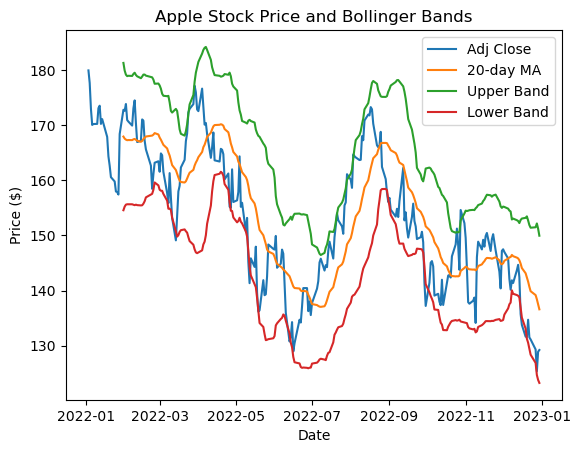

In [56]:
plt.plot(apple_stock['Adj Close'], label ='Adj Close')
plt.plot(apple_stock['20_MA'], label = '20-day MA')
plt.plot(apple_stock['Upper_Band'], label = 'Upper Band')
plt.plot(apple_stock['Lower_Band'], label = 'Lower Band')
plt.title('Apple Stock Price and Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

In [74]:
delta = apple_stock['Adj Close'].diff(1)
gain = (delta.where(delta >0,0)).rolling(window=14).mean()
loss = (-delta.where(delta<0,0)).rolling(window =14).mean()

In [75]:
rs = gain/loss

In [76]:
apple_stock['RSI'] = 100-(100/(1+rs))

In [77]:
apple_stock['RSI']

Date
2022-01-03          NaN
2022-01-04          NaN
2022-01-05          NaN
2022-01-06          NaN
2022-01-07          NaN
                ...    
2022-12-23    26.261644
2022-12-27    27.960299
2022-12-28    26.152359
2022-12-29    30.302171
2022-12-30    31.430329
Name: RSI, Length: 251, dtype: float64

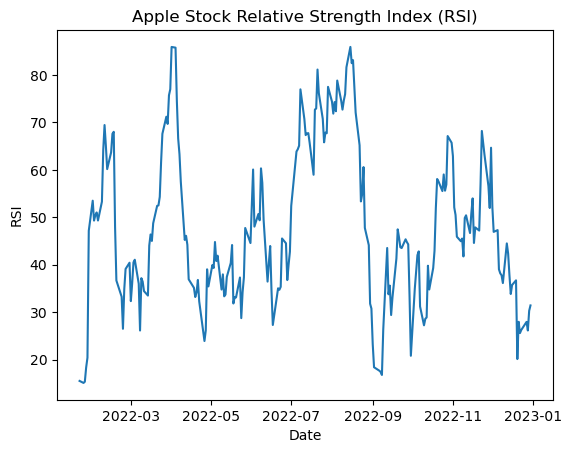

In [78]:
plt.plot(apple_stock['RSI'])
plt.title('Apple Stock Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.show()